In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("data_stocks.csv")

In [3]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [5]:
# check the missing value
data.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.USB        0
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM  

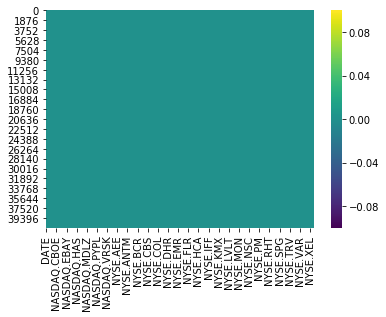

In [6]:
sns.heatmap(data.isna(),cmap='viridis')

In [7]:
# dropping the date column as except this each variable is contineous var
data.drop(["DATE"],1, inplace=True)

In [8]:
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Q.1 There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [9]:
data.shape

(41266, 501)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(data)
print(pca.explained_variance_) #The amount of variance explained by the selected components.
print(pca.components_) # points near to Components

[3.09922383e+04 6.86852475e+03 3.74175439e+03 1.57609353e+03
 5.40413309e+02 4.06852097e+02 3.40508507e+02 2.09137092e+02
 1.68165135e+02 1.24664488e+02 9.29860232e+01 7.14348330e+01
 6.99470929e+01 6.04664002e+01 5.38643953e+01 4.43765267e+01
 4.33493801e+01 3.73225817e+01 2.98966515e+01 2.55778792e+01]
[[-0.21601455 -0.01315403 -0.01995395 ... -0.02188381 -0.00364211
  -0.0160987 ]
 [-0.03075848 -0.01700272  0.01501107 ... -0.00123491 -0.03899061
  -0.01593842]
 [ 0.04724604  0.00774066 -0.02521796 ... -0.01560185  0.01876591
  -0.01637398]
 ...
 [-0.0346899   0.00498081 -0.06737242 ... -0.01800957  0.02796549
  -0.01038815]
 [ 0.08409766 -0.01045305  0.00938558 ... -0.00869817 -0.07095734
  -0.01747499]
 [ 0.15508851 -0.04413535  0.06434652 ... -0.02376869  0.04580156
  -0.00400795]]


Text(0,0.5,'cumulative explained variable')

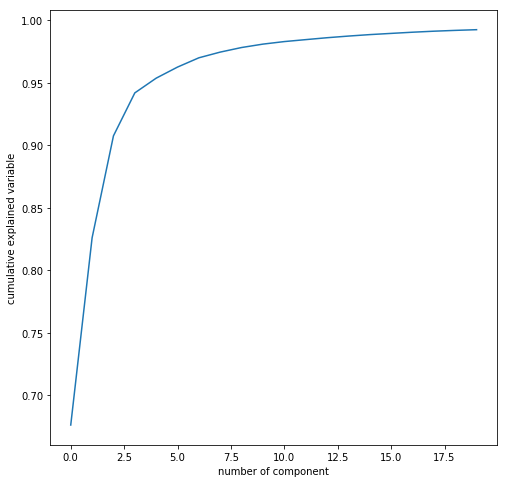

In [11]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #Percentage of variance explained by the selected components.
plt.xlabel("number of component") # np.cumsum is cumulative of array element over given aixs
plt.ylabel("cumulative explained variable")

In [12]:
x_transformed = pca.transform(data)

In [13]:
x_transformed.shape

(41266, 20)

In [14]:
final = pd.DataFrame(x_transformed)

In [15]:
final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,312.064719,82.163267,61.139226,28.755818,6.935543,16.281887,30.701149,-11.747953,12.590705,-9.397490,18.517865,14.097089,-6.922783,16.356192,-9.526059,-0.294730,-3.785065,6.591878,0.019456,5.079262
1,308.408065,78.093483,61.798818,28.178963,6.873320,14.447357,31.186630,-12.186886,13.252831,-11.689846,19.275638,14.935232,-6.027756,16.532688,-10.515392,0.121637,-2.798046,8.582980,0.738216,4.438059
2,306.773648,77.324274,59.118288,30.163907,7.749785,12.284493,29.357302,-10.953506,14.207331,-13.070669,19.500106,14.158790,-5.059532,15.368940,-10.258928,-2.076232,-1.725996,10.163165,1.289607,4.446510
3,306.765035,80.327414,59.100005,31.755701,8.766988,11.618798,28.923774,-11.491002,14.323185,-12.957800,19.560688,14.697144,-5.088822,15.244858,-10.668768,-2.609043,-1.337074,10.020695,1.165749,5.492160
4,304.125592,80.792599,56.901885,34.077765,9.425933,10.022780,27.554326,-10.418945,16.870832,-13.768308,19.016835,13.698467,-4.867988,13.975333,-11.591712,-2.118169,-0.430876,10.850408,1.790989,5.630934


### Above analysis shows that 20 components are required to explain the 90% above varaince

# Q.2 How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [16]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
scaller_data = scaller.fit_transform(data)
scaller_data

array([[-1.46442566, -1.65013444, -1.08607297, ..., -1.95578373,
         0.10281519, -2.04188417],
       [-1.45203837, -1.64093012, -1.08286618, ..., -1.98549977,
         0.06179505, -2.04188417],
       [-1.4879413 , -1.65627065, -1.08445354, ..., -1.98302344,
         0.04931066, -2.03740234],
       ...,
       [ 1.22589025, -0.91072048,  2.17363755, ...,  1.2684067 ,
        -1.26868429,  0.74730823],
       [ 1.26279933, -0.9199248 ,  2.15279336, ...,  1.25602502,
        -1.28295217,  0.73090473],
       [ 1.26279933, -0.91072048,  2.16882735, ...,  1.25107235,
        -1.27403475,  0.74581429]])

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit_transform(scaller_data)

array([[39.575259  , 44.3552707 , 23.32275417, ..., 49.26579536,
        30.68226391, 41.46095537],
       [39.77005218, 44.40603749, 23.34337854, ..., 49.47210207,
        30.73112513, 41.42796432],
       [39.58595642, 44.31663958, 23.27261984, ..., 49.34987845,
        30.68445658, 41.33798418],
       ...,
       [37.99007487, 25.32605709, 44.04036562, ..., 13.64800672,
        42.05297665, 33.21903283],
       [37.92977117, 25.38302598, 43.9591221 , ..., 13.54931102,
        41.92439346, 33.23333592],
       [37.98588848, 25.36465875, 44.02847731, ..., 13.651117  ,
        42.02241208, 33.24343993]])

In [18]:
cluster_no = range(1,25)
cluster = []
for i in cluster_no:
    kmeans = KMeans(n_clusters=i).fit(scaller_data)
    cluster.append(kmeans.inertia_)  ## Sum of Squared Errors
    

In [19]:
cluster_df = pd.DataFrame({'Cluster No.':cluster_no, 'Cluster Error':cluster})
cluster_df

,Cluster Error,Cluster No.
0,2.067427e+07,1
1,1.285818e+07,2
2,9.125500e+06,3
3,6.959930e+06,4
4,5.523680e+06,5
5,4.695790e+06,6
6,4.014381e+06,7
7,3.573400e+06,8
8,3.308331e+06,9
9,2.925841e+06,10


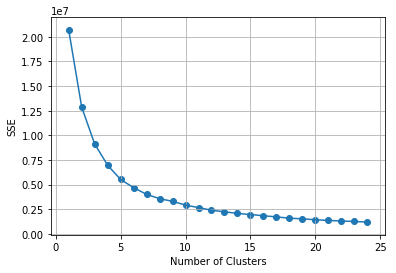

In [20]:
plt.plot(cluster_df['Cluster No.'],cluster_df['Cluster Error'])
plt.scatter(cluster_df['Cluster No.'],cluster_df['Cluster Error'])
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.grid()
plt.show()

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaller_data)
print(y_kmeans)
print(len(y_kmeans))

[2 2 2 ... 4 4 4]
41266


In [22]:
label = kmeans.labels_
label
print("Unique cluster lablels",np.unique(label))

Unique cluster lablels [0 1 2 3 4 5 6]


In [23]:
from sklearn.metrics import silhouette_score
sil_score = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k).fit(scaller_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(scaller_data, label, metric='euclidean', sample_size=15000, random_state=10)
    sil_score.append(sil_coeff)
    print("For k={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

For k=2, The Silhouette Coefficient is 0.34921196571028584
For k=3, The Silhouette Coefficient is 0.3661644294760302
For k=4, The Silhouette Coefficient is 0.3724517652047592
For k=5, The Silhouette Coefficient is 0.3921942877663772
For k=6, The Silhouette Coefficient is 0.3893314010362944
For k=7, The Silhouette Coefficient is 0.39557700435560217
For k=8, The Silhouette Coefficient is 0.39490405562642517


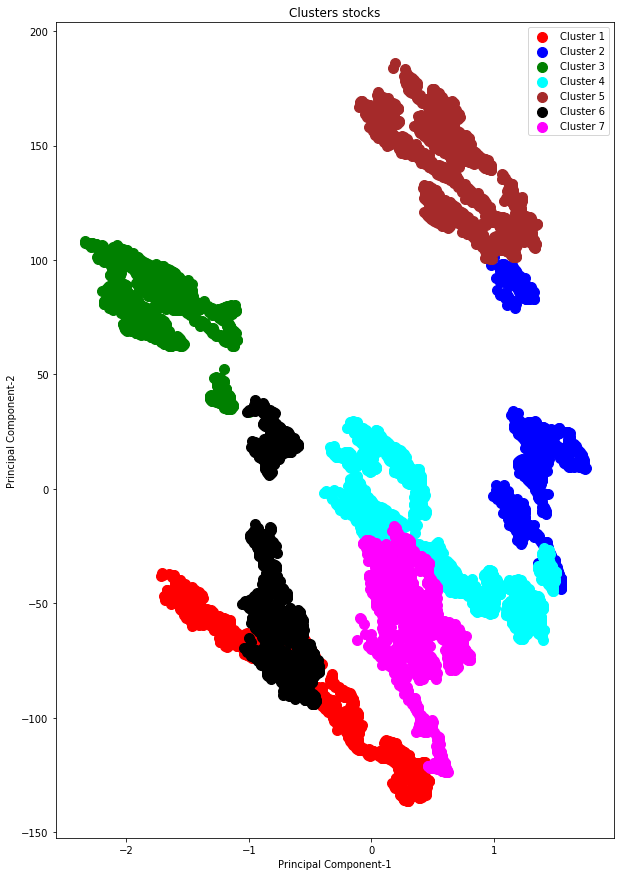

In [24]:
plt.figure(figsize=(10,15))
plt.scatter(scaller_data[y_kmeans == 0, 0], x_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaller_data[y_kmeans == 1, 0], x_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaller_data[y_kmeans == 2, 0], x_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaller_data[y_kmeans == 3, 0], x_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaller_data[y_kmeans == 4, 0], x_transformed[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(scaller_data[y_kmeans == 5, 0], x_transformed[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(scaller_data[y_kmeans == 6, 0], x_transformed[y_kmeans == 6, 1], s = 100, c = 'magenta', label = 'Cluster 7')
plt.title('Clusters stocks')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.legend()
plt.show()

# Identify which all stocks are moving together and which all stocks are different from each other. 

In [25]:
Unique_value , count = np.unique(label,return_counts=True)
print("unique Values=",Unique_value)
print("Counts of Unique value=",count)

unique Values= [0 1 2 3 4 5 6 7]
Counts of Unique value= [5062 6858 5280 5865 4318 4069 6239 3575]
